In [107]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

In [108]:
df = pd.read_csv("C:/Users\MT/Downloads/archive (15)/healthcare/train_data.csv")

In [109]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [110]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [111]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [112]:
df['Bed Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

In [113]:
df['City_Code_Patient'].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [114]:
df[['patientid','City_Code_Patient']]

,patientid,City_Code_Patient
0,31397,7.0
1,31397,7.0
2,31397,7.0
3,31397,7.0
4,31397,7.0
...,...,...
318433,86499,23.0
318434,325,8.0
318435,125235,10.0
318436,91081,8.0


In [115]:
df[df['City_Code_Patient']== 8]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
14,15,6,a,6,X,4,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,2685,0-10
15,16,6,a,6,X,3,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,9398,0-10
16,17,23,a,6,X,4,radiotherapy,Q,F,3.0,63418,8.0,Urgent,Extreme,4,71-80,2933,0-10
17,18,29,a,4,X,4,anesthesia,S,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,5342,20-Nov
18,19,32,f,9,Y,4,radiotherapy,S,B,2.0,63418,8.0,Trauma,Extreme,2,71-80,7442,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318421,318422,19,a,7,Y,2,gynecology,S,C,2.0,70282,8.0,Emergency,Moderate,2,41-50,4277,0-10
318430,318431,6,a,6,X,3,anesthesia,Q,F,4.0,109796,8.0,Trauma,Moderate,2,41-50,5065,21-30
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,20-Nov,3761,20-Nov


In [120]:
na =df.loc[:, ['City_Code_Patient','Bed Grade']]

In [121]:
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(na), columns=na.columns)

In [122]:
df_imputed.isnull().sum()

City_Code_Patient    0
Bed Grade            0
dtype: int64

In [123]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [124]:
df[['Bed Grade2','City_Code_Patient2']] = df_imputed

In [125]:
df.drop(['City_Code_Patient','Bed Grade'],axis=1,inplace=True)

In [126]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'patientid',
       'Type of Admission', 'Severity of Illness', 'Visitors with Patient',
       'Age', 'Admission_Deposit', 'Stay', 'Bed Grade2', 'City_Code_Patient2'],
      dtype='object')

<Axes: >

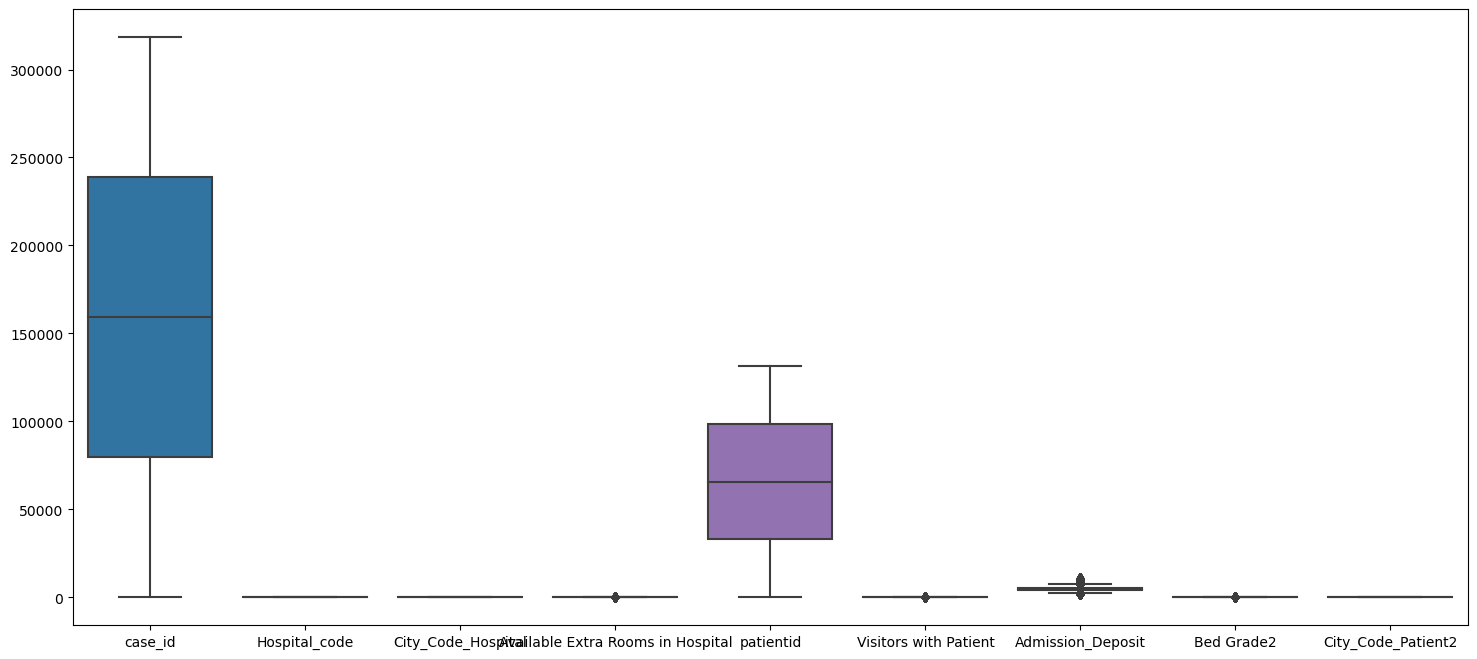

In [127]:
out_df = df
#out_df.drop(['case_id','patientid'],axis=1,inplace=True)
plt.figure(figsize=(18,8))
sns.boxplot(data =out_df)

<Axes: >

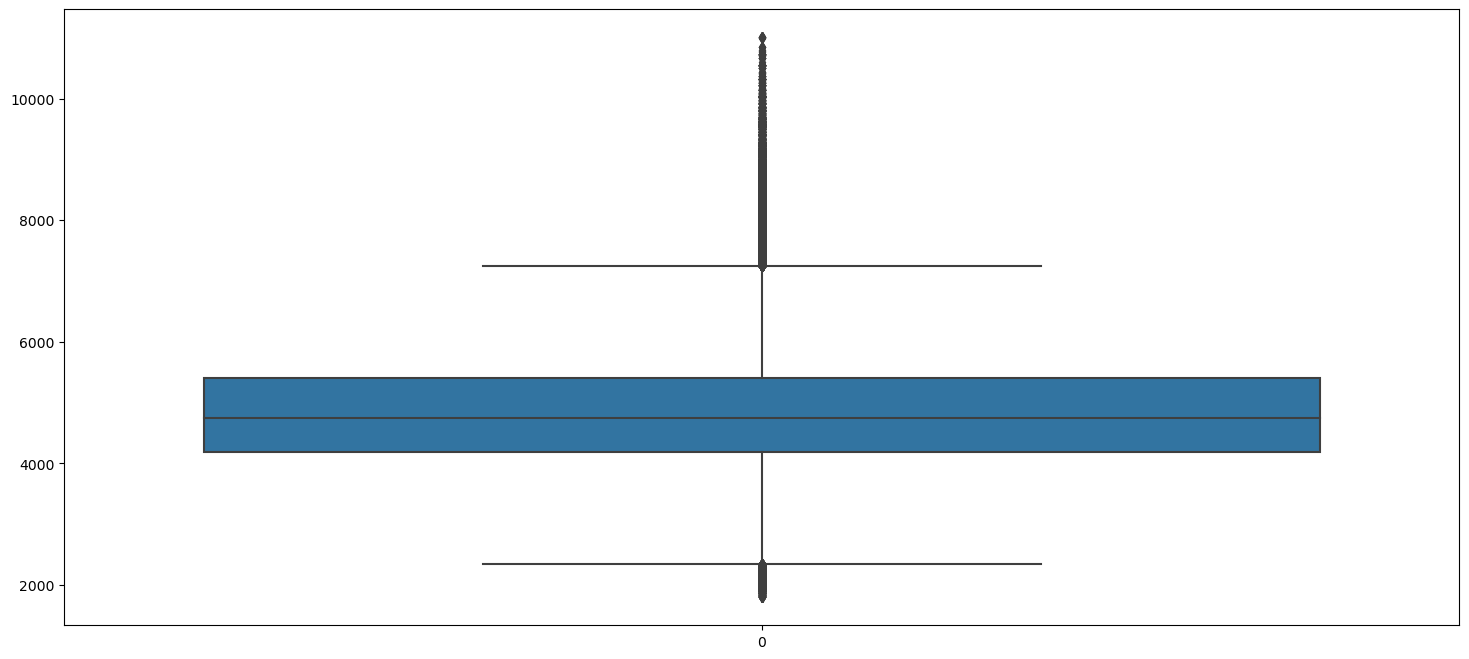

In [128]:
plt.figure(figsize=(18,8))
sns.boxplot(df['Admission_Deposit'])

In [129]:
# Assuming 'column_name' is the column with outliers
Q1 = df['Admission_Deposit'].quantile(0.25)
Q3 = df['Admission_Deposit'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_outliers = df[(df['Admission_Deposit'] < lower_bound) | (df['Admission_Deposit'] > upper_bound)]
print(upper_bound,lower_bound)

7243.5 2351.5


In [130]:
df_outliers[['Admission_Deposit','Hospital_code','Stay']]

,Admission_Deposit,Hospital_code,Stay
3,7272,26,41-50
13,8477,9,21-30
15,9398,6,0-10
18,7442,32,21-30
20,8181,16,31-40
...,...,...,...
318345,7510,23,31-40
318402,2088,28,21-30
318409,8937,30,21-30
318425,8052,15,20-Nov


In [131]:
(df.duplicated()).sum()

0

In [132]:
df[df.duplicated()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Bed Grade2,City_Code_Patient2


In [133]:
df=df.drop_duplicates()

In [134]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '20-Nov', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [135]:
df[df['Stay']=='20-Nov']

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Bed Grade2,City_Code_Patient2
5,6,23,a,6,X,2,anesthesia,S,F,31397,Trauma,Extreme,2,51-60,4449,20-Nov,7.0,2.0
11,12,26,b,2,Y,4,radiotherapy,R,D,31397,Urgent,Extreme,2,51-60,5993,20-Nov,7.0,1.0
17,18,29,a,4,X,4,anesthesia,S,F,63418,Emergency,Extreme,2,71-80,5342,20-Nov,8.0,3.0
22,23,21,c,3,Z,2,anesthesia,S,A,63418,Trauma,Extreme,2,71-80,6364,20-Nov,8.0,3.0
25,26,28,b,11,X,4,gynecology,R,F,8088,Emergency,Moderate,2,31-40,2405,20-Nov,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318428,318429,23,a,6,X,2,gynecology,Q,F,26631,Urgent,Minor,2,20-Nov,4125,20-Nov,10.0,4.0
318431,318432,23,a,6,X,3,anesthesia,Q,F,120672,Urgent,Extreme,2,71-80,4508,20-Nov,2.0,4.0
318433,318434,6,a,6,X,3,radiotherapy,Q,F,86499,Emergency,Moderate,3,41-50,4144,20-Nov,23.0,4.0
318435,318436,7,a,4,X,3,gynecology,R,F,125235,Emergency,Minor,3,71-80,4235,20-Nov,10.0,4.0


In [136]:
df['Stay'].replace({'20-Nov':'11-20'},inplace =True)

In [137]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [138]:
df.to_csv("cleaned_AV_healthcare")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   patientid                          318438 non-null  int64  
 10  Type of Admission                  318438 non-null  object 
 11  Severity of Illness                3184

In [140]:
df['City_Code_Patient2'].unique()

array([2.        , 3.        , 4.        , 1.        , 2.66666667,
       2.33333333])

In [141]:
df['City_Code_Patient2'].replace({2.666667:3.0,2.33333333:2.0},inplace =True)
df['City_Code_Patient2'].unique()

array([2.        , 3.        , 4.        , 1.        , 2.66666667,
       2.33333333])

Text(0.5, 1.0, 'Which hospital in region X serves more  patients ')

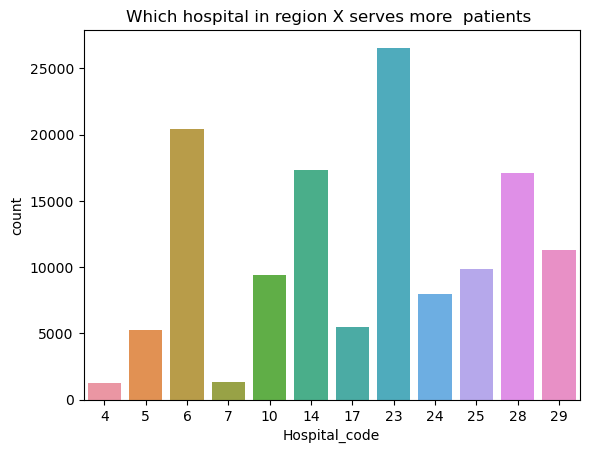

In [142]:
df_X_Region =df[df['Hospital_region_code']=='X'] 
sns.countplot(x = df_X_Region['Hospital_code'])
plt.title("Which hospital in region X serves more  patients ")


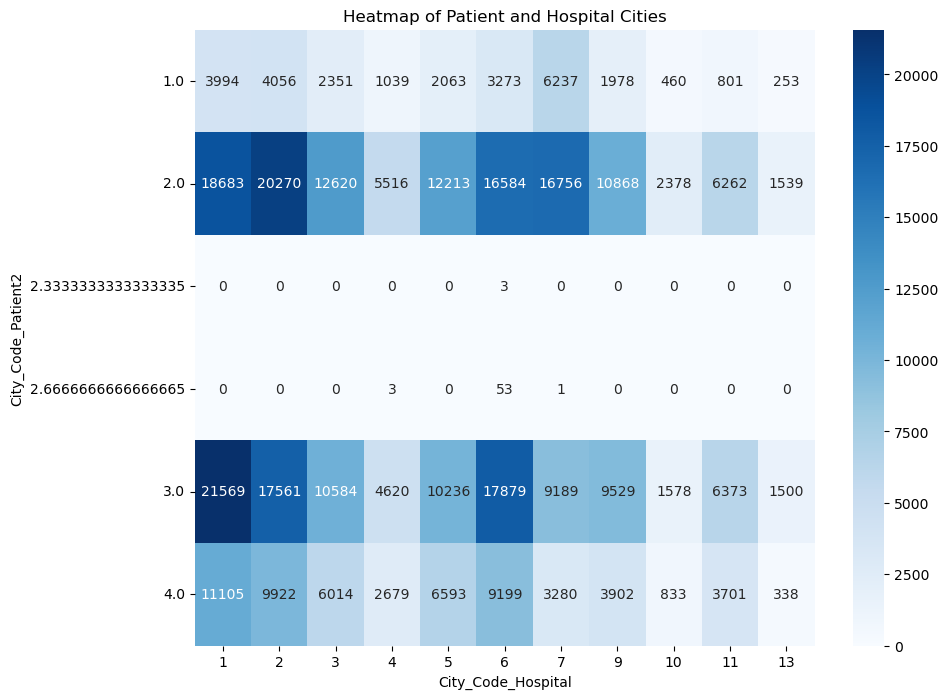

In [169]:
cross_table = pd.crosstab(df['City_Code_Patient2'], df['City_Code_Hospital'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Patient and Hospital Cities')
plt.show()

#most of patients in city 1 go to hospital in 2
#while patients in city 2 go to hospital in city 1
# patient in city 

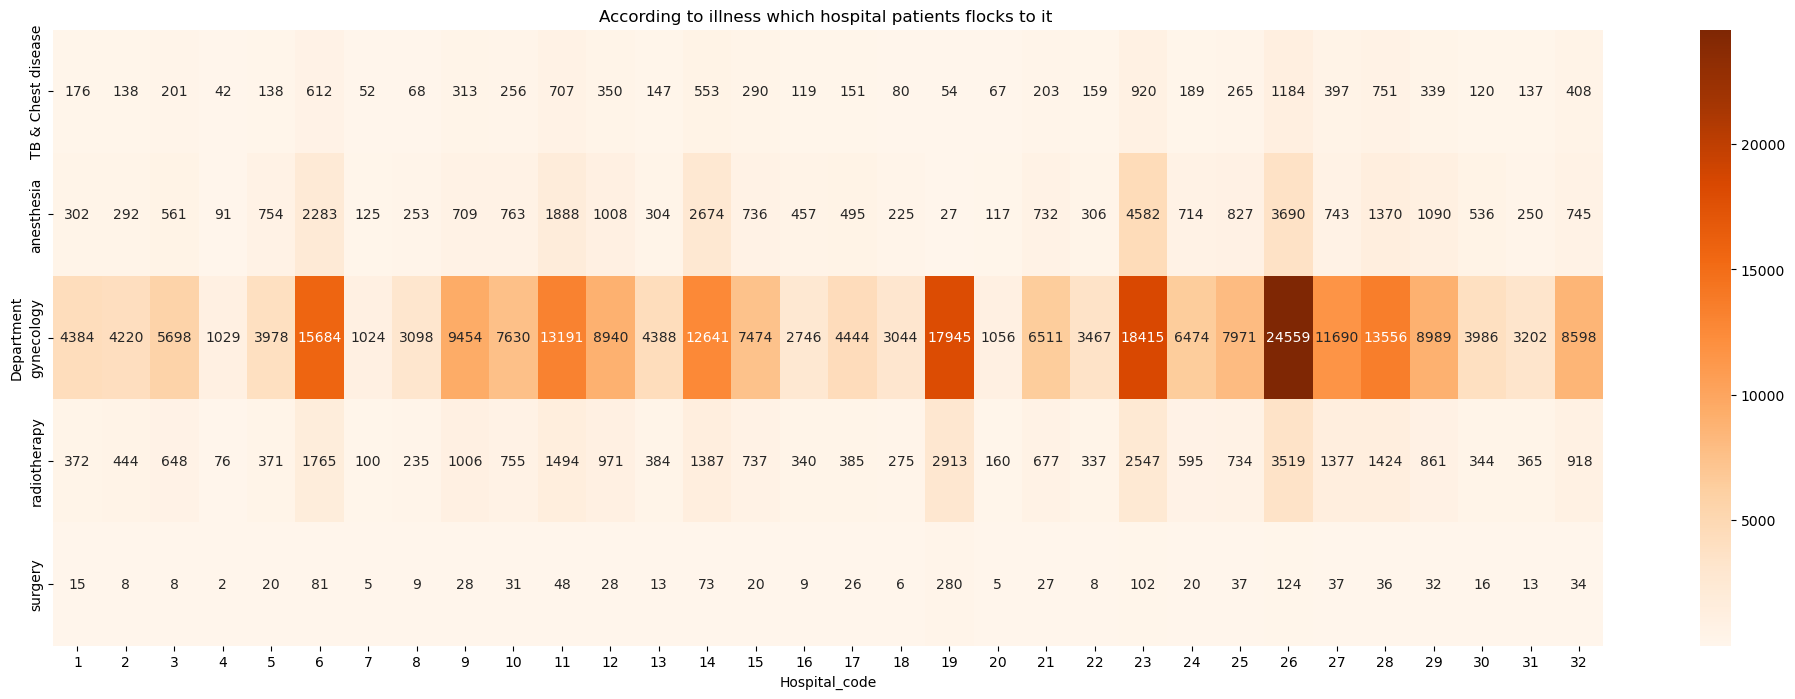

In [170]:
cross_table = pd.crosstab(df['Department'], df['Hospital_code'])
plt.figure(figsize=(25, 8))
sns.heatmap(cross_table, cmap='Oranges', annot=True, fmt='d', cbar=True)
plt.title('According to illness which hospital patients flocks to it ')
plt.show()


In [171]:
group_hospital_region = df.groupby('Hospital_region_code')['Hospital_code'].agg('count')

group_hospital_region
#so we will find that region x have most number of patients 

Hospital_region_code
X    133336
Y    122428
Z     62674
Name: Hospital_code, dtype: int64

In [172]:
fig = px.pie(values = [133336, 122428, 62674 ],names = ['Region X', 'Region Y', 'Region Z'])
fig.show()